In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../data/train_fe.csv")
test = pd.read_csv("../data/test_fe.csv")

In [3]:
train.head()

,area,majoraxislength,minoraxislength,eccentricity,convexarea,extent,perimeter,target
0,0.262568,0.290056,0.254227,0.827058,0.273867,0.646138,0.321550,0.0
1,0.224630,0.140979,0.398693,0.302535,0.229186,0.716253,0.249911,0.0
2,0.287857,0.200529,0.414687,0.495150,0.286038,0.839106,0.274388,0.0
3,0.750744,0.512630,0.676241,0.722318,0.764057,0.775255,0.611673,1.0
4,0.178613,0.253401,0.136156,0.884131,0.179696,0.891770,0.230519,0.0


In [4]:
test.head()

,area,majoraxislength,minoraxislength,eccentricity,convexarea,extent,perimeter,target
0,0.333683,0.292740,0.391650,0.709791,0.343346,0.647720,0.367102,0.0
1,0.173967,0.155915,0.263135,0.625985,0.193709,0.707692,0.256525,1.0
2,0.130239,0.075000,0.282310,0.279650,0.134870,0.785545,0.159653,0.0
3,0.416966,0.410640,0.354285,0.850290,0.426486,0.797411,0.445093,1.0
4,0.116832,0.079873,0.225138,0.464827,0.116180,0.848382,0.129657,0.0


In [5]:
x_train_use, y_train_use= train.drop('target', axis=1), train['target']

In [6]:
x_train,x_val, y_train, y_val=train_test_split(x_train_use, y_train_use, train_size=0.8, random_state=42)

In [7]:
x_train.shape

(576, 7)

### Decision Tree Classifier

#### Max Depth 3

In [8]:
param_grid = {
    'max_depth': list(range(3, 7)),  
    'max_features': list(range(3, 9))  
}


In [9]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)


In [10]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [3, 4, 5, 6, 7, 8]})

In [11]:
best_param=grid_search.best_params_
best_model=grid_search.best_estimator_

In [12]:
best_param

{'max_depth': 5, 'max_features': 7}

In [13]:
best_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=7, random_state=42)

In [14]:
y_pred=best_model.predict(x_train)

In [15]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       288
         1.0       0.98      0.88      0.93       288

    accuracy                           0.93       576
   macro avg       0.94      0.93      0.93       576
weighted avg       0.94      0.93      0.93       576



In [16]:
def plot_confusion_matrix(title,conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.savefig("../conf/"+title+".png")
    plt.show()

In [17]:
conf=confusion_matrix(y_train, y_pred)

<AxesSubplot:>

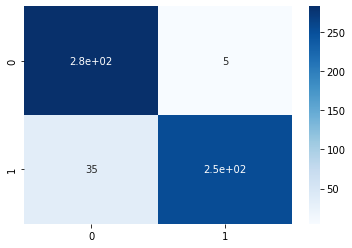

In [18]:
#plot_confusion_matrix("Decision_Tree_Classfier_Train",conf)
sns.heatmap(conf, annot=True, cmap= "Blues")

In [19]:
y_pred_val=best_model.predict(x_val)

In [20]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87        68
         1.0       0.95      0.79      0.86        76

    accuracy                           0.87       144
   macro avg       0.88      0.87      0.87       144
weighted avg       0.88      0.87      0.87       144



In [21]:
conf_val=confusion_matrix(y_val, y_pred_val)

<AxesSubplot:>

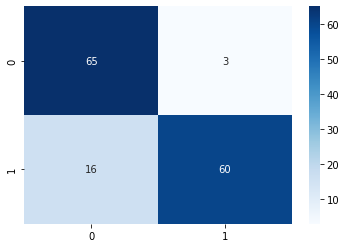

In [22]:
#plot_confusion_matrix("Decision_Tree_Classfier_Validate",conf_val)
sns.heatmap(conf_val, annot=True, cmap= "Blues")

### Extract Result

In [23]:
import time

start=time.time()

best_model.fit(x_train_use, y_train_use)

elapse=time.time()-start

In [24]:
pred_use= best_model.predict(x_train_use)

In [25]:
cross_val_score(best_model, x_train_use, y_train_use, scoring='f1')

array([0.83453237, 0.84507042, 0.86111111, 0.8030303 , 0.87022901])

In [26]:
print(classification_report(y_train_use, pred_use))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       356
         1.0       0.99      0.86      0.92       364

    accuracy                           0.93       720
   macro avg       0.93      0.93      0.92       720
weighted avg       0.93      0.93      0.92       720



In [27]:
f1_train = f1_score(y_train_use, pred_use)
prec_train = precision_score(y_train_use, pred_use)
recall_train = recall_score(y_train_use, pred_use)

In [28]:
x_test, y_test= test.drop('target', axis=1), test['target']

In [29]:
pred_test=best_model.predict(x_test)

In [30]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85        94
         1.0       0.85      0.80      0.83        86

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180



In [31]:
f1_test = f1_score(y_test, pred_test)
prec_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)

In [32]:
conf_test=confusion_matrix(y_test, pred_test)

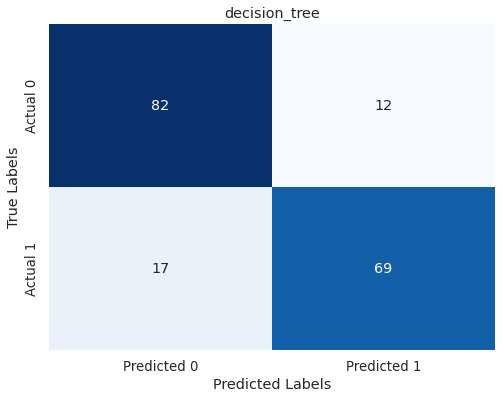

In [33]:
plot_confusion_matrix("decision_tree",conf_test)

In [34]:
df=pd.DataFrame()
df["f1_test"] = [f1_test]
df["f1_train"] = f1_train
df["prec_train"] = prec_train
df["prec_test"] = prec_test
df["recall_train"] = recall_train
df["recall_test"] = recall_test
df["model"] = "Decision Tree"
df["elapsed"] = elapse

In [35]:
df.head()

,f1_test,f1_train,prec_train,prec_test,recall_train,recall_test,model,elapsed
0,0.826347,0.920821,0.987421,0.851852,0.862637,0.802326,Decision Tree,0.008134


In [36]:
df.to_csv("../results/regular/dtc.csv", index=False)